In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

Importeer data uit CSV bestand met Pandas en zet dat in de `df` variabel.

In [64]:
df = pd.read_csv('../Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Schoon de geimporteerde data op en sla de verschillende ESRB ratings op in de `ratings` variabel.

In [65]:
df.drop(['title'], inplace=True, axis=1)
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

Vervang de ESRB rating met niets zeggende waarde.

In [66]:
df['esrb_rating'] = df['esrb_rating'].replace(
    'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)

Sla de ESRB rating op in de `y` variabel en sla de rest van de data zonder `esrb_rating` op in de `x` variabel. 

In [67]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis = 1)

In [68]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.7953586497890295


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       119
           1       0.68      0.66      0.67        82
           2       0.78      0.74      0.76       179
           3       0.80      0.78      0.79        94

    accuracy                           0.80       474
   macro avg       0.78      0.79      0.79       474
weighted avg       0.79      0.80      0.79       474



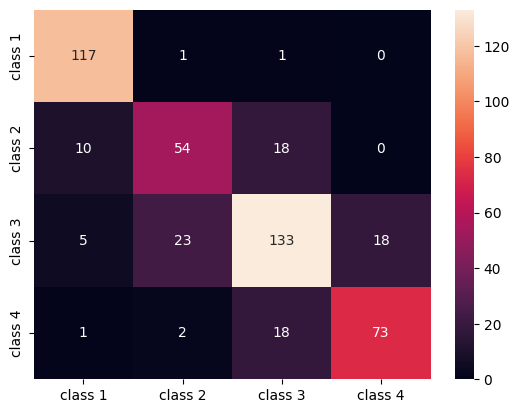

In [73]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

In [74]:
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

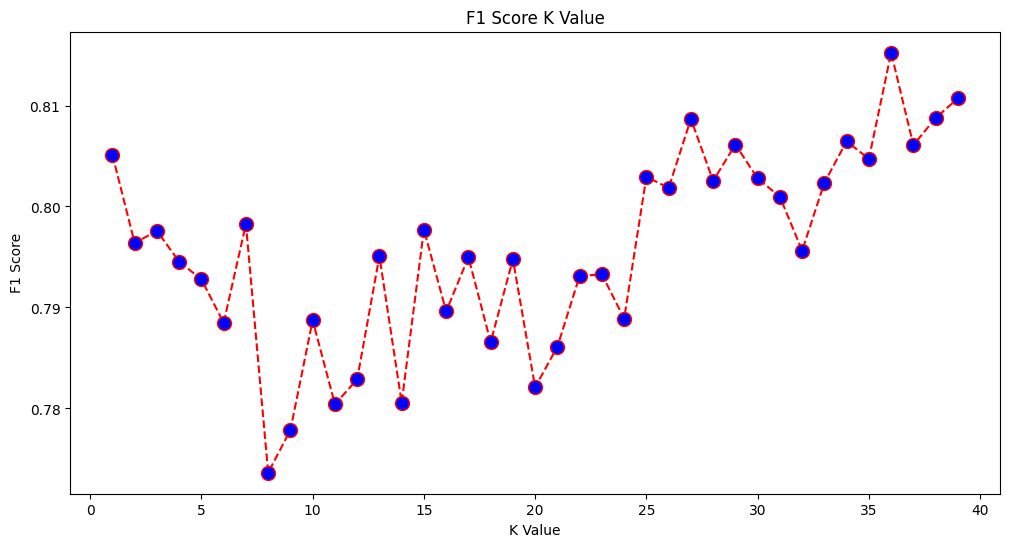

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [76]:
t = pd.DataFrame(f1s)

In [77]:
classifier15 = KNeighborsClassifier(n_neighbors=35)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       119
           1       0.58      0.67      0.62        82
           2       0.79      0.77      0.78       179
           3       0.93      0.84      0.88        94

    accuracy                           0.80       474
   macro avg       0.80      0.80      0.80       474
weighted avg       0.81      0.80      0.80       474

